In [22]:
import sys
import os
import time
# Importing the main code.
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from main_adapted import Processing_parameters, Clock_drift
ext = os.path.join(module_path, "jupyter-tutorials")

# Testing installation and data requirements
TODO: explain the formats of the data and station information. 

In [13]:
# Parameters for locating the files where the correlation files and station 
# information is contained.
station_file = os.path.join(ext, "station_info_test")
path2data_dir = os.path.join(ext, "data_test")

# The reference time is zero time to which the dates of the correlations
# will be compared. It can be the date of deployment. 
reference_time = '2014-08-21T00:00:00.000000Z'

# Initialize the parameters that will be used to process al the correlation files.
params = Processing_parameters(
    freqmin = 0.15, # Low freq. for the bandpass filter
    freqmax = 0.3, # High freq. for the bandpass filter 
    ref_vel = 2500, # m/s
    dist_trh = 2.0, # Minimum station separation in terms of wavelength
    snr_trh = 10, # Signal-to-noise ratio threshold
    noise_st = 240, # start of the noise window.
    dt_err = 0.004, # Sampling interval needs to be multiple of this value.
    resp_details = False
    )

### Clock drift object
Is the object where all the information of our stations, correlations and calculations will be stored. To initialize it you will need the parameters_object, a reference time (considered as the zero time), the location of the station file, and the location of the folder where the correlations are stored (path2datadir).

The method will show you if there are no correlations for a specific station (given in the station_file).

In [17]:
# The main object of this program is called Clock_drift.
# Here all the information about our stations, correlations,
# and calculations will be stored.
cd = Clock_drift(station_file=station_file, 
                 path2data_dir=path2data_dir, 
                 reference_time=reference_time, 
                 processing_parameters=params)
print(cd)

No correlation files found for station:O04
No correlation files found for station:GEV
No correlation files found for station:HAS
Clock_drift object
There are 6 stations in Clock_drift object. 



TODO: Explain all the attributes of the clock drift object and how it store values.
### Correlations contained in the clock drift object.
TODO: Explain the same for the correlation objects.

In [19]:
print(cd.correlations[0])


 Correlation object
 Station 1: HAH
 Station 2: O01
 Average date of CC: 2014-10-17T11:50:32.000000Z
 Number of days: 100.0
 Path: /Users/localadmin/Dropbox/GitHub/clock_errors/clock_errors_py/jupyter-tutorials/data_test/HAH_O01_1413546632_100.sac
 first_apriori_dt1: Not calculated yet.
 first_apriori_dt2: Not calculated yet.
 apriori_station1: Not calculated yet.
 apriori_station2: Not calculated yet.
 t_app: Not calculated yet.



### Stations contained in the clock drift object.
TODO: Explain the attributes of the station object.

In [20]:
print(cd.stations[0])


 Station object
 Code: O01
 Index: 0
 Project: IMAGE
 Sensor type: PZ_OBS
 Needs correction: True
 Latitude: 63.78344
 Longitude: -22.01142
 Elevation: -106.0
 a values: []
 b values: []


### Apriori estimates
TODO: Explain how we are currently calculating the first apriori estimates.
TODO: Explain where the results are saved.

Calculating the apriori estimates for each stationpair.
---Calculating apriori times takes --- 0.0007009506225585938 seconds ---


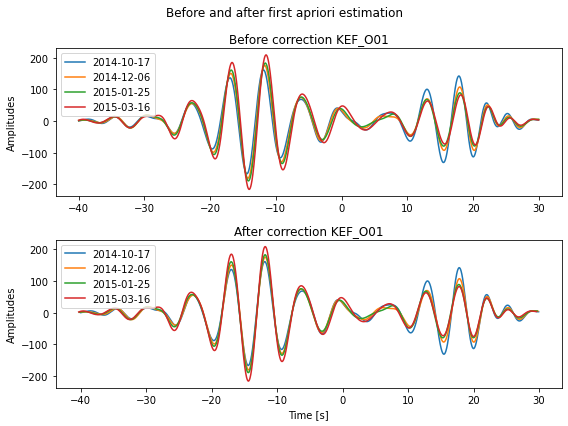

In [25]:
start_time = time.time()
cd.calculate_appriori_estimates()
print("---Calculating apriori times takes --- %s seconds ---" % (time.time() - start_time))

# ###################3 Some plotting functions ###############################
station1_code = 'O01'
station2_code = 'KEF'
cd.plot_before_n_after_first_apriori_estimation(station1_code, station2_code,
                                                min_t = -40, max_t = 30)

### Calculating the apparent times
TODO: Explain hot the apparent times are calculated, and the theory behind it.

In [34]:
#%%
start_time = time.time()
cd.calculate_tapp_4_allcorrelations()
print("---Calculating apparent times takes --- %s seconds ---" % (time.time() - start_time))
cd.df.head(4)

Calculating the apriori estimates for each stationpair.
Calculating the t_app for each stationpair.
---Calculating apparent times takes --- 1.3029401302337646 seconds ---


,Station1,Station2,average_date,t_app[s],Station_separation[m],Number_of_days_correlated
0,HAH,O01,2014-10-17T11:50:32.000000Z,0.868,34833.461021,100.0
1,HAH,O01,2014-12-06T13:32:36.000000Z,1.224,34833.461021,100.0
2,HAH,O01,2015-01-25T11:56:16.000000Z,1.316,34833.461021,100.0
3,HAH,O01,2015-03-16T12:38:29.000000Z,1.576,34833.461021,100.0


### Building the matrix
TODO: Explain how the matrix is build and the theory behind it.

In [ ]:
#%%
start_time = time.time()
cd.build_matrices()
print("---Building the matrix takes --- %s seconds ---" % (time.time() - start_time))

### Inverting the matrix.
TODO: Explain the scipy linalg package for inverting the matrix using minimum-least-squares approach.
TODO: Explain how the data is stored after the inversion in ach of the stations and how to visualize if using the dataframes.

In [35]:
#%%
start_time = time.time()
cd.solve_eq()
print("---Inverting the matrix takes --- %s seconds ---" % (time.time() - start_time))
cd.solution

Inverting the matrix and calculating a and b for each station.
---Inverting the matrix takes --- 0.0050029754638671875 seconds ---


,a (O01),b (O01),a (O02),b (O02),a (O03),b (O03)
values,0.013126,-1.171885,-0.008621,0.896467,0.018885,-1.288101
